#Introdaction to Quantum computing
####Quantum Surgery

Auther:Mohammad Sa'adoon - Mohammadkahlil.m.saadoon@student.uts.edu.au

In this notebook, we will walk through one of the key principles in Quantum Computing is Superposition. This notebook aims to give a holistic idea of the term Superposition.

 Importing necessary libraries before we go.

In [ ]:
#@markdown Make sure that you have all these libaries available to run the code successfully ;)
!pip install qiskit --quiet
!pip install pylatexenc --quiet

import numpy as np
import requests
import os
import json
import base64
import qiskit.result
from IPython.core.display import Javascript
from qiskit import *
from google.colab import output
import IPython
import io
import types 
import typing
import qiskit as q
import qiskit.providers as p
import qiskit.visualization as qv
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram
%matplotlib inline
#@markdown Current Quokka address:

#@markdown req_str = 'http://4d80-138-25-210-65.ngrok.io/qsim/perform_operation'
req_str = 'http://4d80-138-25-210-65.ngrok.io/qsim/perform_operation'
#@markdown req_str_qasm = 'http://4d80-138-25-210-65.ngrok.io/qsim/qasm'
req_str_qasm = 'http://4d80-138-25-210-65.ngrok.io/qsim/qasm'

#Introdaction to Quantum Superpositions

Quantum computers are based on quantum superposition, and it is a phenomenon associated with a quantum system. Through superposition, quantum objects can exist in more than one state or location simultaneously. [Microsoft's](https://docs.microsoft.com/en-us/azure/quantum/overview-understanding-quantum-computing) quantum computing team gives an excellent example of a superposition state, e.g. "Imagine that you are exercising in your living room. You turn to your left and then all the way to your right. Now turn to your left and your right at the same time. You cannot do it (not without splitting yourself in two, at least). You cannot be in both of those states at once – you cannot be facing left and right simultaneously."

The famous classical exmple of superpostion [Schrödinger’s cat](https://www.youtube.com/watch?v=67MG6_N0msg). In short, Schrödinger's thought is to put a cat in a closed box and predict if the cat is both dead and alive simultaneously. In that state, the cat is in superposition form until we open the box and observe the condition. The following equation will give more intuition about the superposition state.

\begin{equation}
    |+ \rangle = \frac{1}{\sqrt{2}} (|0 \rangle + |1 \rangle) \\
    |- \rangle = \frac{1}{\sqrt{2}} (|0 \rangle - |1 \rangle) \\
\end{equation}




To play with a simple model of qubits and generate a superposition state. The Hadamard gate allows converting from basis state to superposition state and vice versa. We can see that this performs the transformations below:

\begin{equation}
  H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
  \end{bmatrix} \\
   H |0 \rangle \mapsto |+ \rangle \\
   H |1 \rangle \mapsto |- \rangle \\
\end{equation}

let's get our hands dirty with code...

# Superpositions in Qiskit 
Let's create a very basic quantum circuit using a Hadamard gate.

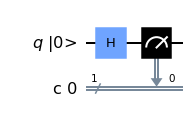

In [ ]:
#create a one qubit quantum circuit
qc = qiskit.QuantumCircuit(1,1)
#do the Hadamard gate
qc.h(0)
#measure the qubit
qc.measure(0,0)
#view our circuit
qc.draw(initial_state=True, output="mpl")


To simulate the created circite and define the Superposition state. We can see that by running the circuit many times, seeing the measured value every time get different values and plotting the results in a histogram.The result will be either 0's or 1's.

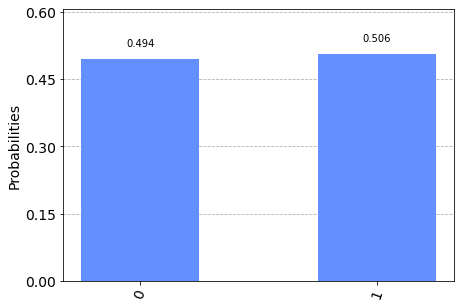

In [ ]:
sim = qiskit.Aer.get_backend('aer_simulator')
qobj = qiskit.assemble(qc)
results = sim.run(qobj).result().get_counts()
qiskit.visualization.plot_histogram(results)

#The power of Superpositions in Deutsch-Jozsa algorithm

Let us take a further step and dive deeper into the Superposition universe. As we mentioned earlier, superposition can generate an implicit power in solving computing problems—one of the great algorithms that could prove that, such as the Deutsch-Jozsa algorithm.

The [Deutsch-Jozsa algorithm]("https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html") define as

Let us say we have a hidden boolean function $f$ which takes a set of input of bits and will return either 0 or 1. we know the boolean function has two forms balanced or constant. A constant for any input, the output will be either 0's or 1's, or the balanced function will return 0's for half of the input and 1's for the other half.


Using classical computation, we could quickly check if the function is balanced: e.g. if both $f(0,0,0,...)$ and $f(1,0,0,...)$,we would know if the function return different output. However, on the other side, we have to take also the worst-case scenario. We need to measure half of all possible inputs +1 to know whether the function is balanced or constant.


Let us simulate in a quantum solution, consider instead using $2^{(N-1)}+1$ function to accomplish a constant call. However, we could implement that using a quantum oracle function(boolean function) as a one-shot learner. However, we need to remember that we use a quantum superposition that will affect our qubit state to determine if the function calls constant and balanced.

The example below represents the performance of the Deutsch-Jozsa using the oracle function.

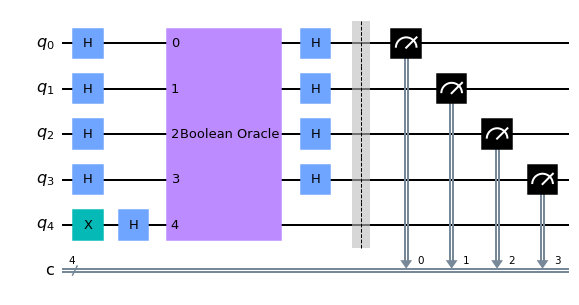

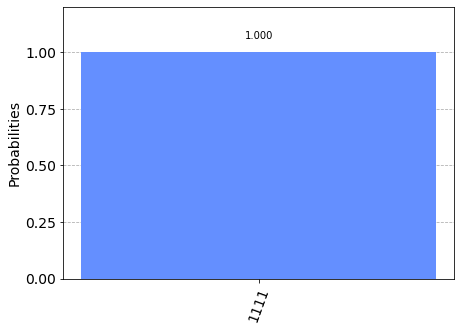

In [ ]:
# Reference: https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

N = 4 
def dj_algo_oracle(type, N):
  oracle = q.QuantumCircuit(N + 1)

  if type == "bal":
    rand = np.random.randint(1, 2**N)
    bit_rep = format(rand, f'0{str(N)}b')
    for qubit in range(len(bit_rep)):
      oracle.x(qubit) if bit_rep[qubit] == '1' else None

    for i in range(N):
      oracle.cx(i, N)

    for i in range(len(bit_rep)):
      oracle.x(i) if bit_rep[i] == '1' else None

  if type == "const":
    oracle.x(N) if np.random.randint(2) == 1 else None
    
  gate = oracle.to_gate()
  gate.name = "Boolean Oracle"
  return gate

def dj_algo(gate, n):

  dj = q.QuantumCircuit(N + 1, N)
  for i in range(N):
    dj.h(i)

  dj.x(N)
  dj.h(N)

  dj.compose(gate, inplace=True)
  for i in range(N):
    dj.h(i)

  dj.barrier()

  for i in range(N):
    dj.measure(i,i)

  return dj

gate = dj_algo_oracle('bal', N)
dj = dj_algo(gate, N)


aer = q.Aer.get_backend('aer_simulator')
trans = q.transpile(dj, aer)
asm = q.assemble(trans)
res = aer.run(asm).result()
ans = res.get_counts()

display(dj.draw(output="mpl"), qv.plot_histogram(ans))



Before we end up with this section, we must admit that using the superposition has shown impressive outcomes when applied in quantum computing algorithms.

# Superpositions in Quokka 

Now let us try to get our hands dirty with the Quokka device. To set that up, we need to convert that to QASM.QASM is a Quantum Assembly Language where the file can generate quantum circuits. We could do that by using Qiskit, which has a built-in QASM converter.

For QASM version 2, we have to stick with specific rules that will help run the program correctly.


*   Define the version of QASM are using in our case will be  **OPENQASM 2.0**
*   Define another file by including **include "filename"**
*   Define either a unitary gate as **gate name ()**, or opaque gate as **opaque gate()**.
*   Define register of qubits or bits as **qreg q[]**, **creg c[]**.

We can inside any of these registers perform some operations, such as:
*   Add a bit in CNOT gates could help to generate another gate like X gate, Hadamard gate **CX q[0],q[1]** 
*   Measure the result of the qubit register to classical **measure q-> c;**
*   Reset the qubit to the balance state **reset q[0]**
*   Conditional apply quantum operation **(if creg==q)**.

For more details, I would recommend referring to the [QASM documention](https://arxiv.org/abs/1707.03429).




Using the function below, we can convert to QASM.





In [ ]:
def qasm(code, print_vector=True):
    data = {
        'script': code,
        'count': 1,
        'state_vector': print_vector
    }
    result = requests.post(req_str_qasm, json=data)
    
    return json.loads(result.content)

res = qasm("""
OPENQASM 2.0;
qreg qr[2];
x qr[1];
""")
print("Output: {}".format(res['result']['qr'][0][0]['binary_pattern'][::-1]))

Output: 01


The code below represents an example of Quantum Fourier Transform (QFT)and measure.For more information about [QFT](https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html), refer to the qiskit text book.

{'1': 1}


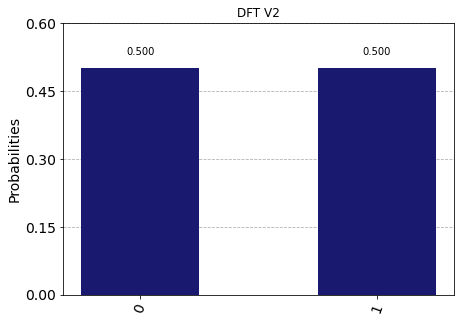

In [ ]:
#https://github.com/openqasm/openqasm/blob/OpenQASM2.x/examples/teleport.qasm
qasm_str = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
creg c0[1];
creg c1[1];
creg c2[1];
creg c3[1];
h q;
barrier q;
h q[0];
measure q[0] -> c0[0];
if(c0==1) u1(pi/2) q[1];
h q[1];
measure q[1] -> c1[0];
if(c0==1) u1(pi/4) q[2];
if(c1==1) u1(pi/2) q[2];
h q[2];
measure q[2] -> c2[0];
if(c0==1) u1(pi/8) q[3];
if(c1==1) u1(pi/4) q[3];
if(c2==1) u1(pi/2) q[3];
h q[3];
measure q[3] -> c3[0];
"""
# You can choose other backend also.
backend = BasicAer.get_backend("qasm_simulator")
message = qiskit.execute(qc, backend, shots=1).result().get_counts()

# Execute the circuit and show the result.
job = execute(qc,backend)
result = job.result()
counts =result.get_counts()

print(message)
plot_histogram(job.result().get_counts(), color='midnightblue', title="QFT V2")

{'1': 1}


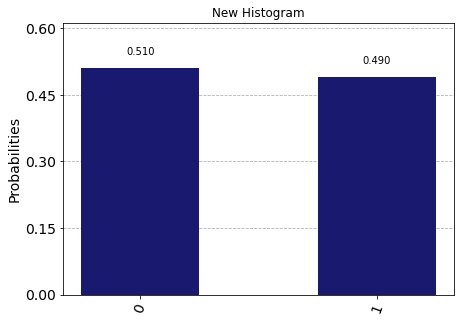

In [ ]:

#https://github.com/openqasm/openqasm/blob/main/examples/inverseqft1.qasm
qasm_str = """
OPENQASM 3;
include "stdgates.inc";

qubit[4] q;
bit[4] c;
reset q;
h q;
barrier q;
h q[0];
c[0] = measure q[0];
if(int[4](c) == 1) { rz(pi / 2) q[1]; }
h q[1];
c[1] = measure q[1];
if(int[4](c) == 1){ rz(pi / 4) q[2]; }
if(int[4](c) == 2){ rz(pi / 2) q[2]; }
if(int[4](c) == 3){ rz(pi / 2 + pi / 4) q[2]; }
h q[2];
c[2] = measure q[2];
if(int[4](c) == 1) rz(pi / 8) q[3];
if(int[4](c) == 2) rz(pi / 4) q[3];
if(int[4](c) == 3) rz(pi/4+pi/8) q[3];
if(int[4](c) == 4) rz(pi / 2) q[3];
if(int[4](c) == 5) rz(pi / 2 + pi / 8) q[3];
if(int[4](c) == 6) rz(pi / 2+ pi / 4) q[3];
if(int[4](c) == 7) rz(pi / 2 + pi / 4 + pi / 8) q[3];
h q[3];
c[3] = measure q[3];
"""
# You can choose other backend also.
backend = BasicAer.get_backend("qasm_simulator")
message = qiskit.execute(qc, backend, shots=1).result().get_counts()

# Execute the circuit and show the result.
job = execute(qc,backend)
result = job.result()
counts =result.get_counts()

print(message)
plot_histogram(job.result().get_counts(), color='midnightblue', title="QFT V3")

Lastly, I hope you enjoyed the tour. For a warm-up, look at both codes above and tell the difference between QASM v2 and QASM v3. Try to implement QPE ;)

#References





*   [Open Quantum Assembly Language](https://arxiv.org/abs/1707.03429)
*   [Quantum Computing as a High School Module](https://arxiv.org/abs/1905.00282)
*   [Deutsch-Jozsa algorithm]("https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html")
*   [Understanding quantum computing]("https://docs.microsoft.com/en-us/azure/quantum/overview-understanding-quantum-computing")




